In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
a) Load house sales data from file kc_house_data.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables. Are all of them meaningful?

In [2]:
#a)
#Your code:
path = 'kc_house_data.csv'

df = pd.read_csv(path)
df.head(5)

#Hint: read_csv(), head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
#b) 

print(df.columns)

house_categorical_df = df[['id','waterfront','view','condition','grade','zipcode']]
house_numerical_df = df[['date','price','bedrooms','bathrooms','sqft_living','floors','sqft_lot','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long','sqft_living15','sqft_lot15']]

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


#### I've marked view, condition and grade as categorical, but they also can be marked as numerical e.g. calculating mean.

In [4]:
#c)
#Your code:
house_numerical_df.describe()

#Hint: Function describe()

,price,bedrooms,bathrooms,sqft_living,floors,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.494309,1.510697e+04,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,0.539989,4.142051e+04,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,5.200000e+02,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,1.000000,5.040000e+03,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,1.500000,7.618000e+03,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,2.000000,1.068800e+04,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,3.500000,1.651359e+06,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


#### This data tells us basic statistic of numerical data from house dataset. Not all data is meaningful! E.g. mean of yr_renovated. If house wasn't renovated, basic value is 0, and because of that we get 84.4, which is ridiculous number!

## Exercise 2
Using scatter plot:  
a) Show the relation of square footage and price.  
b) Check how price is influenced by apartment's grade. Find other variables correlated with price.  
c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located. 

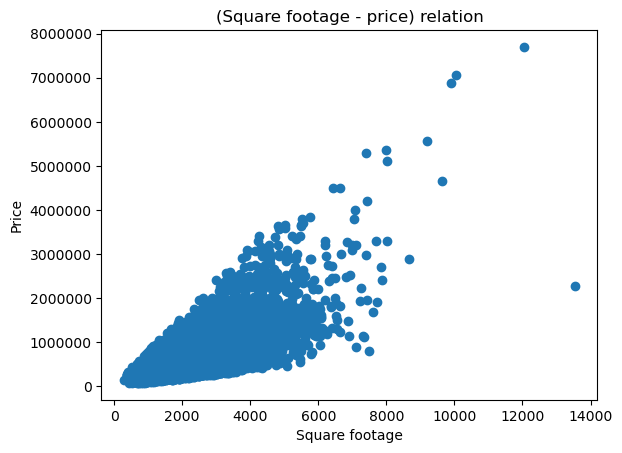

In [5]:
#a)
#Your code:
sqft_living = df['sqft_living']
price = df['price']

plt.scatter(sqft_living, price)
plt.xlabel('Square footage')
plt.ylabel('Price')
plt.title('(Square footage - price) relation')
plt.ticklabel_format(style='plain')

plt.show()

#Hint plt.scatter

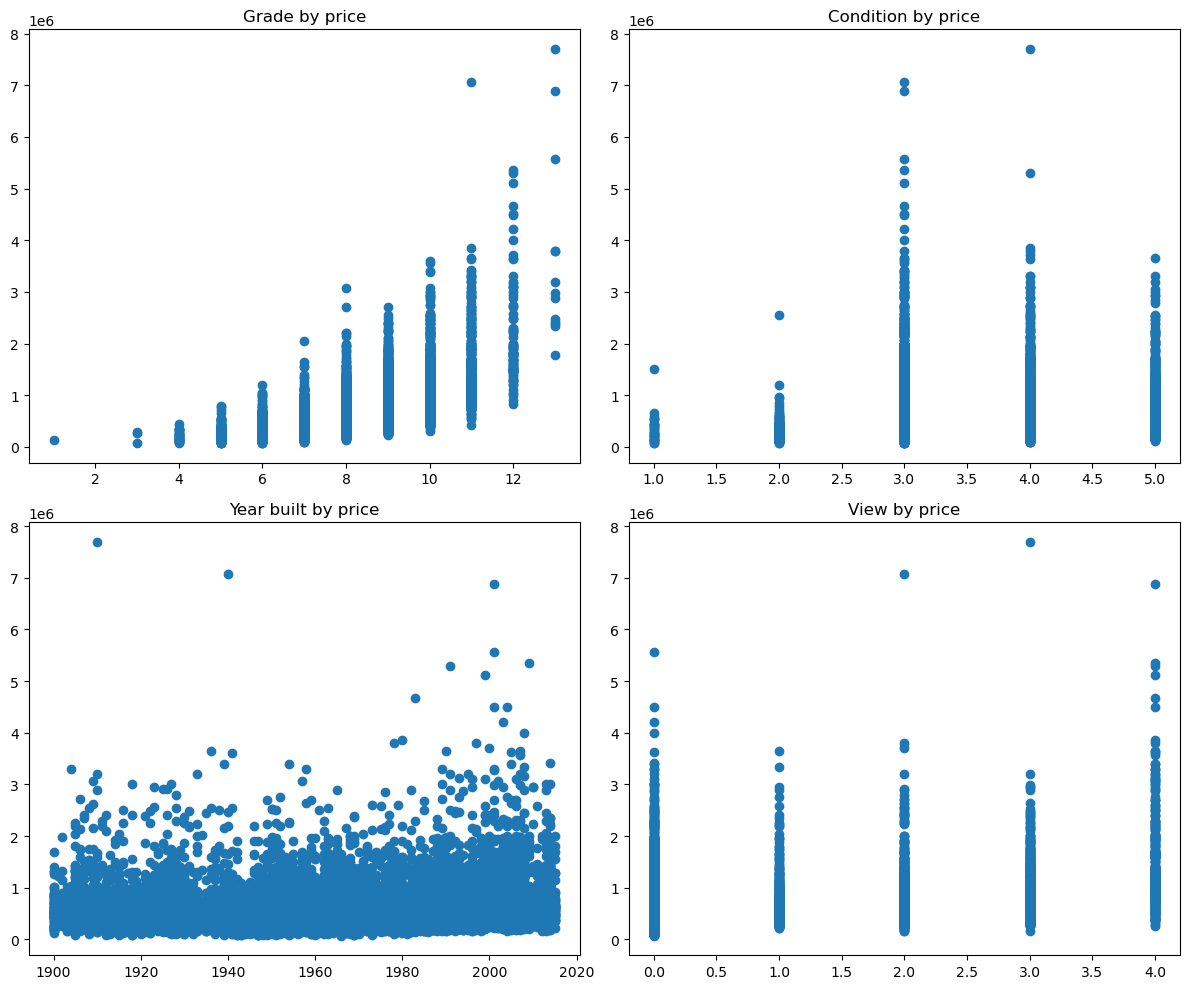

In [6]:
#b)
#Your code:
grade = df['grade']
condition = df['condition']
yr_built = df['yr_built']
view = df['view']

fig, axs = plt.subplots(2, 2, figsize=(12,10))

axs[0,0].scatter(grade, price)
axs[0,0].set_title('Grade by price')

axs[0,1].scatter(condition, price)
axs[0,1].set_title('Condition by price')

axs[1,0].scatter(yr_built, price)
axs[1,0].set_title('Year built by price')

axs[1,1].scatter(view, price)
axs[1,1].set_title('View by price')

plt.tight_layout()
plt.show()

#### As we can see, the most significant differences are in grade and condition plots. Year of build and view grading are less important in price of houses.

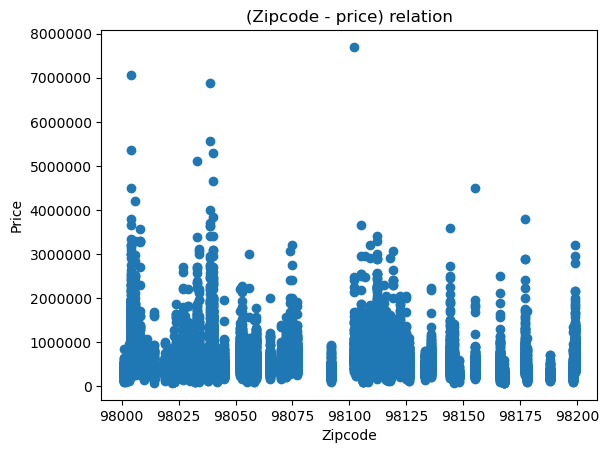

In [7]:
#c)
#Your code:
zipcode = df['zipcode']

plt.scatter(zipcode, price)
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.title('(Zipcode - price) relation')
plt.ticklabel_format(style='plain')

plt.show()

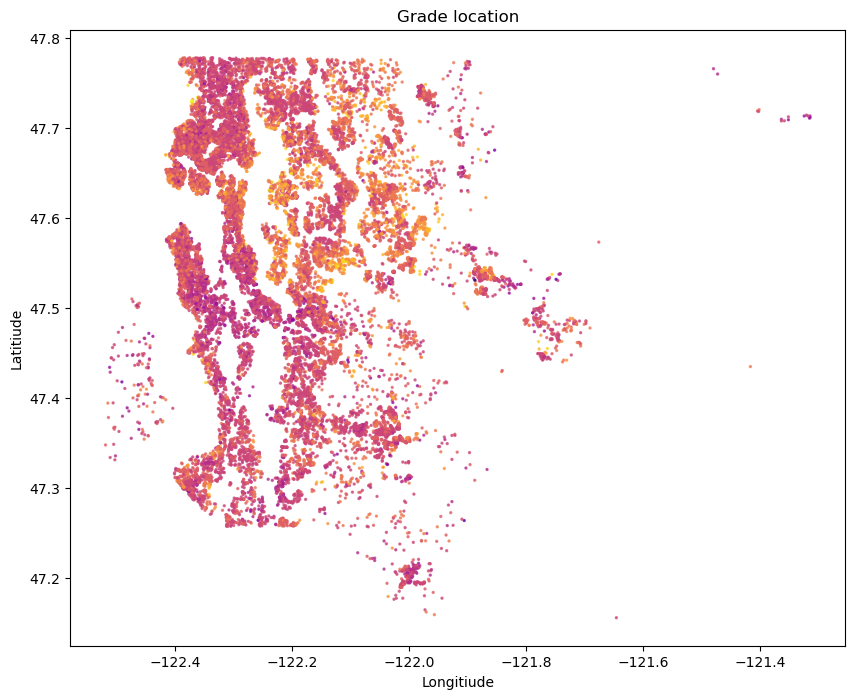

In [8]:
#Your code:
lat = df['lat']
long = df ['long']
plt.figure(figsize=(10,8))
plt.scatter(long, lat, c=grade, cmap='plasma', alpha=0.7, s=2)

plt.xlabel('Longitiude')
plt.ylabel('Latitiude')
plt.title('Grade location')
plt.show()

## Exercise 3
a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  
b) Create mosaic plot of any two categorical variables.

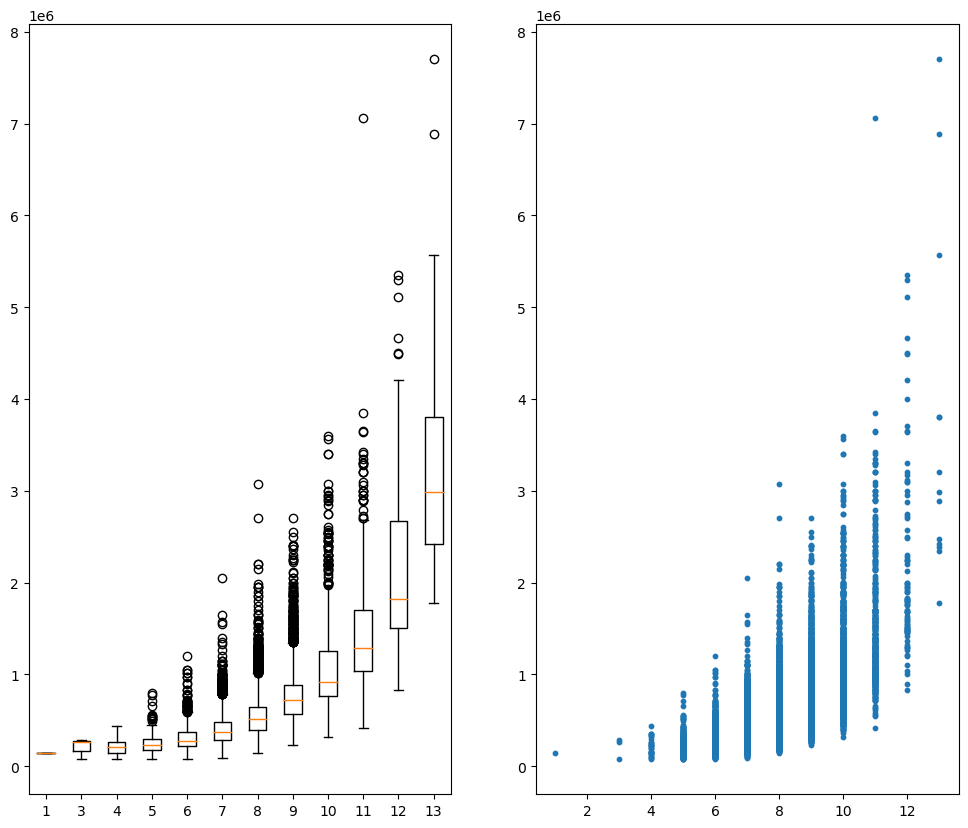

In [9]:
#a)
#Your code:
unique_grades = grade.unique()
unique_grades.sort()

price_boxplot = [df[df['grade'] == grade]['price'].values for grade in unique_grades]

fig, axs = plt.subplots(1, 2, figsize=(12,10))


axs[0].boxplot(price_boxplot, labels=unique_grades)
axs[1].scatter(grade, price, s=10)
plt.show()

#Hint: plt.boxplot

#### As we can see at boxplot, best graded houses have widest IQR and lowest number of fliers, but also significant increase in median price

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


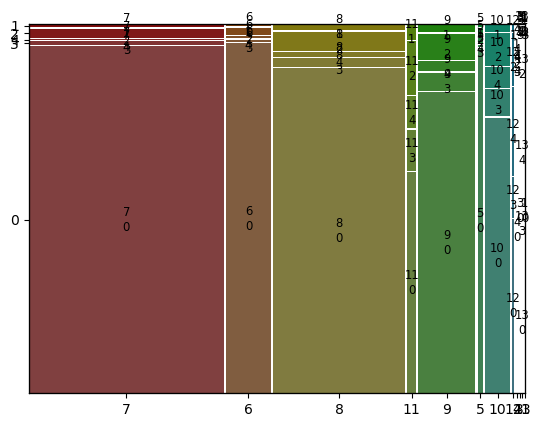

In [10]:
#b)
from statsmodels.graphics.mosaicplot import mosaic

#Your code:
mosaic(df, ['grade', 'view'])

plt.show()


#### Mosaic plot is capable of ploting at least 2 variables, but is criticised for making the data hard to compare visually.

## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

In [11]:
#a)
#Your code:
df_req = df.loc[(df['bedrooms'] == 3) & (df['bathrooms'] == 2) & (df['floors'] == 2)]

#Hint: pandas.DataFrame.loc

In [12]:
df_req.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
16,1875500060,20140731T000000,395000.0,3,2.0,1890,14040,2.0,0,0,...,7,1890,0,1994,0,98019,47.7277,-121.962,1890,14018
150,3362900810,20140820T000000,532170.0,3,2.0,1360,3090,2.0,0,0,...,8,1360,0,1990,0,98103,47.6838,-122.353,1500,3090
294,9297300045,20140709T000000,550000.0,3,2.0,1970,4166,2.0,0,3,...,8,1270,700,1929,0,98126,47.5717,-122.375,2390,4166
365,723099065,20150130T000000,465000.0,3,2.0,1840,40438,2.0,0,0,...,7,1840,0,1994,0,98045,47.4853,-121.709,1380,44049
462,8944290160,20141104T000000,230000.0,3,2.0,1510,3413,2.0,0,0,...,7,1510,0,1985,0,98031,47.3912,-122.167,1570,3777
733,4021100045,20140715T000000,550000.0,3,2.0,2380,17950,2.0,0,0,...,8,2110,270,1934,0,98155,47.7591,-122.280,2030,23900
822,2021200370,20140901T000000,1100000.0,3,2.0,3010,5000,2.0,0,2,...,9,1890,1120,1931,0,98199,47.6347,-122.396,2688,5000
894,880000189,20140811T000000,209000.0,3,2.0,1230,1340,2.0,0,0,...,7,1020,210,2003,0,98106,47.5260,-122.361,1260,1312
1175,2767601375,20140821T000000,505000.0,3,2.0,1500,2500,2.0,0,0,...,8,1500,0,2002,0,98107,47.6748,-122.385,1550,5000
1360,6821600390,20150108T000000,815000.0,3,2.0,2310,6000,2.0,0,1,...,9,1560,750,1926,0,98199,47.6480,-122.395,2000,6000


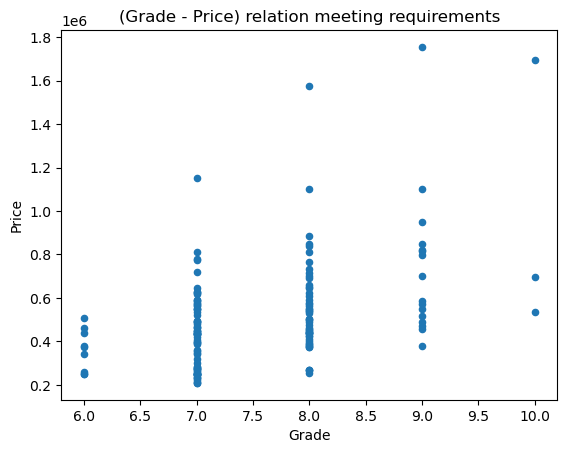

In [13]:
#b)
#Your code:
price = df_req['price']
grade = df_req['grade']
plt.scatter(grade, price, s=20)
plt.title('(Grade - Price) relation meeting requirements')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()


In [14]:
#c)
#Your code:

df_req_bestprice = df_req.copy()

df_req_bestprice['best_price'] = df_req_bestprice['price'] / df_req_bestprice['sqft_living']
df_req_bestprice.sort_values('best_price')


#Hint: .loc, .sort_values(), .index

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,best_price
9704,7452500565,20140829T000000,260000.0,3,2.0,2710,5000,2.0,0,0,...,2710,0,1951,0,98126,47.5188,-122.373,850,5000,95.940959
11258,7937600262,20140710T000000,379900.0,3,2.0,3110,44967,2.0,0,0,...,3020,90,1999,0,98058,47.4343,-122.082,2150,44967,122.154341
19880,3832050860,20150319T000000,210000.0,3,2.0,1580,4961,2.0,0,0,...,1580,0,2006,0,98042,47.3338,-122.053,2280,5000,132.911392
16014,5104450440,20141113T000000,252500.0,3,2.0,1810,10684,2.0,0,0,...,1810,0,1987,0,98058,47.4619,-122.153,2140,9657,139.502762
20906,3355400242,20141028T000000,274900.0,3,2.0,1936,6612,2.0,0,0,...,1936,0,2014,0,98001,47.2602,-122.246,1620,21600,141.993802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14379,9829200325,20140617T000000,765000.0,3,2.0,1570,7000,2.0,0,2,...,1050,520,1971,0,98122,47.6061,-122.286,1990,6675,487.261146
13853,6795100330,20140625T000000,1150000.0,3,2.0,2110,18815,2.0,0,0,...,2110,0,1979,0,98075,47.5836,-122.042,2690,21010,545.023697
10527,5318100935,20141020T000000,850000.0,3,2.0,1540,3600,2.0,0,0,...,1540,0,1900,1988,98112,47.6343,-122.283,2970,3600,551.948052
5827,9829200250,20150105T000000,1697000.0,3,2.0,2600,6600,2.0,0,4,...,1930,670,1970,2014,98122,47.6055,-122.285,2670,6270,652.692308


#### As we can see, house with ID 9704 declassifies other houses with the only price - sqft_living ratio under 100.